<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Gathering

In [43]:
df = pd.read_csv("car_dataset.csv")

In [44]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
df.shape

(301, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [47]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


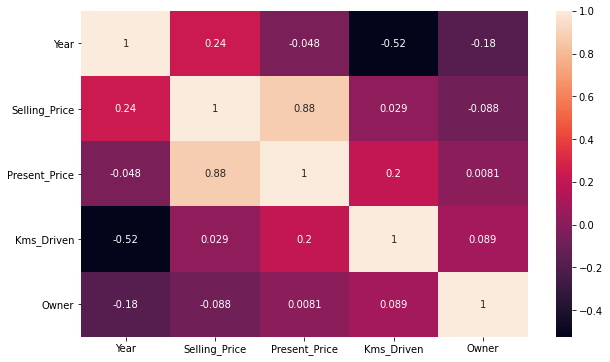

In [48]:
sns.heatmap(df.corr(), annot=True);

# Data Preparation

In [49]:
df1 = df.copy()

In [50]:
df1["Age"] = max(df1["Year"]) - df1["Year"]

In [51]:
df1.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,3
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,3
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,2
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,3


In [52]:
df1.drop("Year", axis=1, inplace=True)

In [53]:
df1["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [54]:
df1["Car_Name"].value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
innova                        9
ciaz                          9
i20                           9
grand i10                     8
amaze                         7
Royal Enfield Classic 350     7
jazz                          7
eon                           6
ertiga                        6
sx4                           6
swift                         5
alto k10                      5
i10                           5
ritz                          4
Royal Enfield Thunder 350     4
etios liva                    4
Bajaj Pulsar 150              4
wagon r                       4
dzire                         4
Bajaj Pulsar NS 200           3
Honda CB Hornet 160R          3
etios g                       3
Royal Enfield Thunder 500     3
etios cross                   3
TVS Apache RTR 160            3
xcent                         3
Bajaj Av

In [55]:
df1.drop("Car_Name", axis=1, inplace=True)

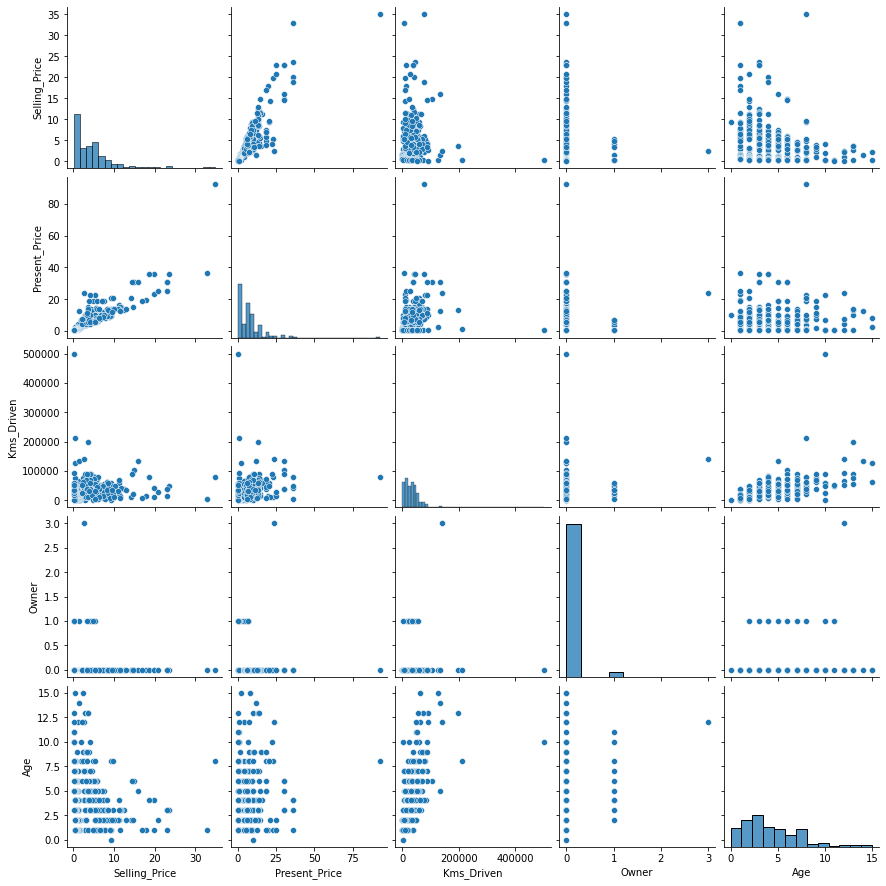

In [56]:
sns.pairplot(df1);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [57]:
df1 = df1.join(df1["Fuel_Type"].str.get_dummies().add_prefix("ft_"))
df1 = df1.join(df1["Seller_Type"].str.get_dummies().add_prefix("st_"))
df1 = df1.join(df1["Transmission"].str.get_dummies().add_prefix("tm_"))

In [58]:
df1.drop(["Fuel_Type", "Seller_Type", "Transmission"], axis=1, inplace=True)

In [59]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,ft_CNG,ft_Diesel,ft_Petrol,st_Dealer,st_Individual,tm_Automatic,tm_Manual
0,3.35,5.59,27000,0,4,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,5,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,1,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,7,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,4,0,1,0,1,0,0,1


In [60]:
df1.shape

(301, 12)

### Features and target variable

In [61]:
X = df1.drop(columns="Selling_Price")
y = df1["Selling_Price"]

### Splitting data into training and testing

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

##  Model Building (Linear Regression)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression(normalize=True).fit(X_train, y_train)

# Interpret the model

In [66]:
lm.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
       -1.55797201e+00,  1.06127426e+00, -9.51485147e-01,  6.10083723e-01,
       -6.10083723e-01,  5.04341411e-01, -5.04341411e-01])

In [67]:
print("Model intercept  : ", lm.intercept_, "\n")

for i in range(len(X.columns)):
    print(X.columns[i], ": ", lm.coef_[i])

Model intercept  :  4.090832637721173 

Present_Price :  0.4452579698976294
Kms_Driven :  -1.8706729757022365e-05
Owner :  -0.8135775776586638
Age :  -0.3190477645588819
ft_CNG :  -1.5579720136504578
ft_Diesel :  1.061274259294639
ft_Petrol :  -0.9514851468591304
st_Dealer :  0.6100837230214855
st_Individual :  -0.6100837230214866
tm_Automatic :  0.5043414108081353
tm_Manual :  -0.5043414108081357


In [68]:
test_pred = lm.predict(X_test)

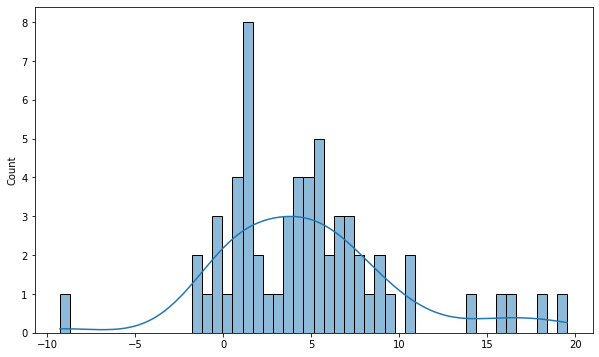

In [69]:
sns.histplot(test_pred, bins=50, kde=True);

In [70]:
comp_dict = {"Actual":y_test, "Pred":test_pred, "Residual":(y_test-test_pred)}
compare = pd.DataFrame(comp_dict)
compare.head(10)

,Actual,Pred,Residual
67,9.25,10.707296,-1.457296
99,9.65,10.875207,-1.225207
266,3.65,4.430969,-0.780969
222,6.00,5.913378,0.086622
24,2.90,2.549419,0.350581
282,8.25,9.036746,-0.786746
279,6.25,7.273781,-1.023781
138,0.60,1.493600,-0.893600
50,14.90,16.022866,-1.122866
234,5.50,4.741886,0.758114


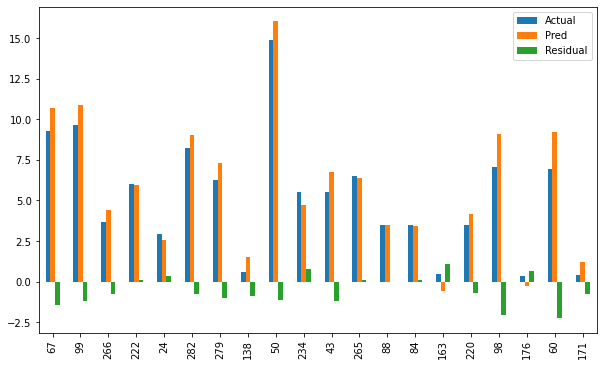

In [71]:
compare.head(20).plot(kind="bar");

# Model Evaluation

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [74]:
eval_metric(y_test, test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8589039971923109
MAE 		: 1.181176915707684
MSE 		: 3.7871262249676487
RMSE 		: 1.9460540138874998


In [75]:
train_pred = lm.predict(X_train)

In [76]:
eval_metric(y_train, train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.879844039130107
MAE 		: 1.137457593394412
MSE 		: 3.056095425123057
RMSE 		: 1.7481691637604917


# Regularization

# Ridge

# Lasso

## Elastic-Net 